# Homework 4: Demonstrating the Spiral-down effect

### Importing libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3 
plt.rc('font', family='arial', size=20)
import numpy as np
import scipy.stats as st
import math

### Defining system parameters and functions

In [3]:
def find_prot_level(data,prices):
    num_flights = np.sum(data)
    return np.where(np.cumsum(data)/num_flights>=1-prices[1]/prices[0])[0][0]
        
def generate_arrivals(T,lmbd_arr):
    arrivals = np.zeros(T)
    tmp = np.random.multinomial(1,lmbd_arr,size=[T,1])
    for t in range(T):
        arrivals[t] = tmp[t].nonzero()[1].item()
    return arrivals    

In [25]:
def simulate_sales(arrivals,c,prices,prot_level):
    state = c
    x = prot_level
    sales = np.zeros(len(prices))
    for a in arrivals:
        if state>0:
            if a == 1 or a == 3:
                state -= 1
                sales[0] += 1
                if x>0: x-=1
            elif a == 2 and state>x:
                state -= 1
                sales[1] += 1
            elif a == 4:
                state -= 1
                if state>x:
                    sales[1] += 1
                else:
                    sales[0]+=1
                    if x>0: x-=1
    return sales

In [26]:
# System parameters: capacity, time horizon, fare-class prices
c = 100 
T_av = 100 
fare_classes = [1,2]
prices = np.array([200,100])

# fare-class request arrival probabilities [lmbd_0,lmbd_1,lmbd_2,lmbd_12,lmbd_21]
lmbd_arr = np.array([0.1,0.3,0.6,0.0,0.0])
lmbd_arr = lmbd_arr/sum(lmbd_arr)

### Part (a): Testing the simulator (single sample-path, protection-levels 0 and 100)

In [27]:
T = 200

arrivals = generate_arrivals(T,lmbd_arr)

prot_level = 0
sales = simulate_sales(arrivals,c,prices,prot_level)
revenue= np.sum(sales*prices)
print("Protection level = 0\nClass 1 tickets sold = {sales[0]}\nClass 2 tickets sold = {sales[1]}\nRevenue= {revenue}".format(**locals()))

prot_level = 100
sales = simulate_sales(arrivals,c,prices,prot_level)
revenue= np.sum(sales*prices)
print("\nProtection level = 100\nClass 1 tickets sold = {sales[0]}\nClass 2 tickets sold = {sales[1]}\nRevenue= {revenue}".format(**locals()))

Protection level = 0
Class 1 tickets sold = 30.0
Class 2 tickets sold = 70.0
Revenue= 13000.0

Protection level = 100
Class 1 tickets sold = 58.0
Class 2 tickets sold = 0.0
Revenue= 11600.0


### Part (b): Revenue vs. protection-levels (for $T=100$ and $T=200$)

**NOTE**: For $X\sim$Binomial$(n,p))$, we have Median$(X)=\lfloor np\rfloor$

For $T=100$
* $D_1\sim$Binomial$(100,0.3)$. 
* From Littlewood's Rule, we have $x^* = F^{-1}(1-p_2/p_1) = F^{-1}(1/2) = 30$ 

For $T=200$
* $D_1\sim$Binomial$(200,0.3)$. 
* From Littlewood's Rule, we have $x^* = F^{-1}(1-p_2/p_1) = F^{-1}(1/2) = 60$ 


In [ ]:
prot_level_array = np.arange(c+1)
num_samples = 1000

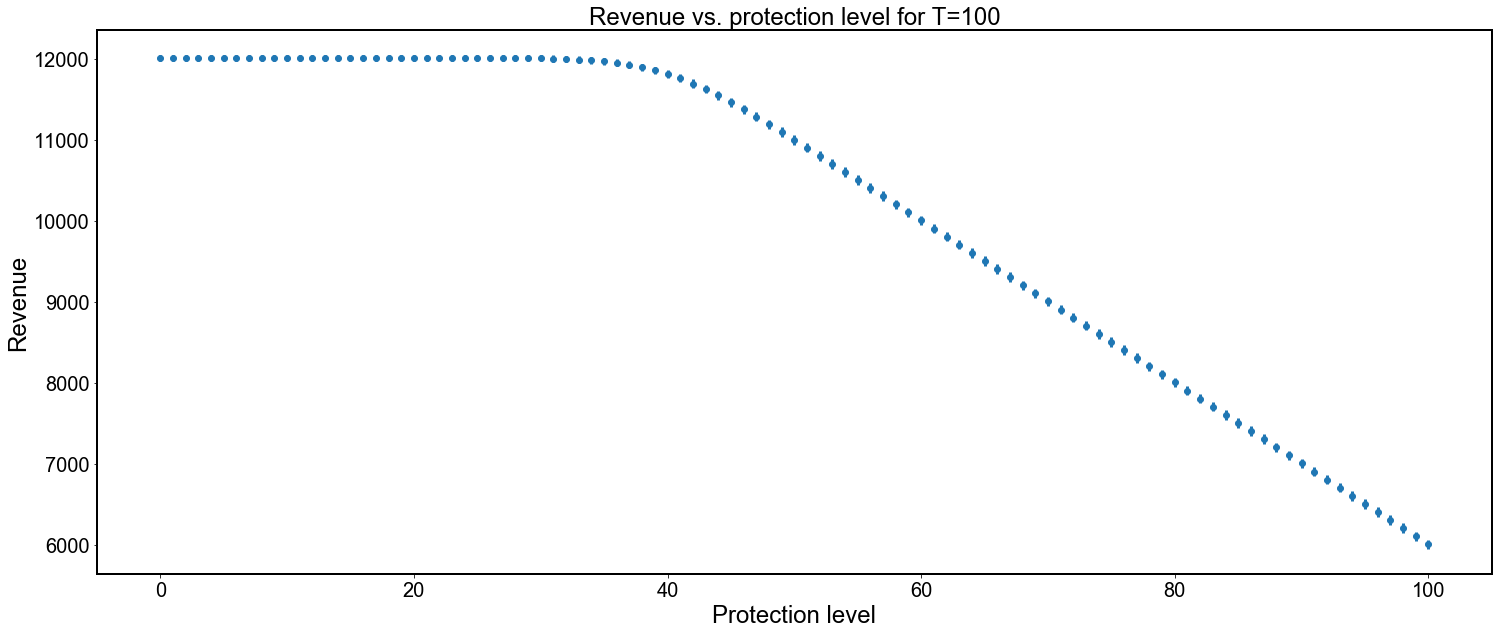

In [32]:
T = 100
revenue = np.zeros((c+1,num_samples))


for i in range(num_samples):    
    arrivals = generate_arrivals(T,lmbd_arr)
    for prot_level in prot_level_array:
        sales = simulate_sales(arrivals,c,prices,prot_level)
        revenue[prot_level,i]+= np.sum(sales*prices)
    
rev_stats = []
for x in prot_level_array:
    rev_stats.append((np.mean(revenue[x]),st.t.interval(0.95, len(revenue[x])-1, loc=np.mean(revenue[x]), scale=st.sem(revenue[x]))))
y_err_lower = [rev_stats[i][0]-rev_stats[i][1][0] for i in range(c+1)]
y_err_upper = [rev_stats[i][1][1]-rev_stats[i][0] for i in range(c+1)]
avg_revenue = [rev_stats[i][0] for i in range(c+1)]

plt.errorbar(prot_level_array,avg_revenue,yerr = [y_err_lower,y_err_upper],fmt='o')
plt.xlabel('Protection level')
plt.ylabel('Revenue')
plt.title('Revenue vs. protection level for T=100')


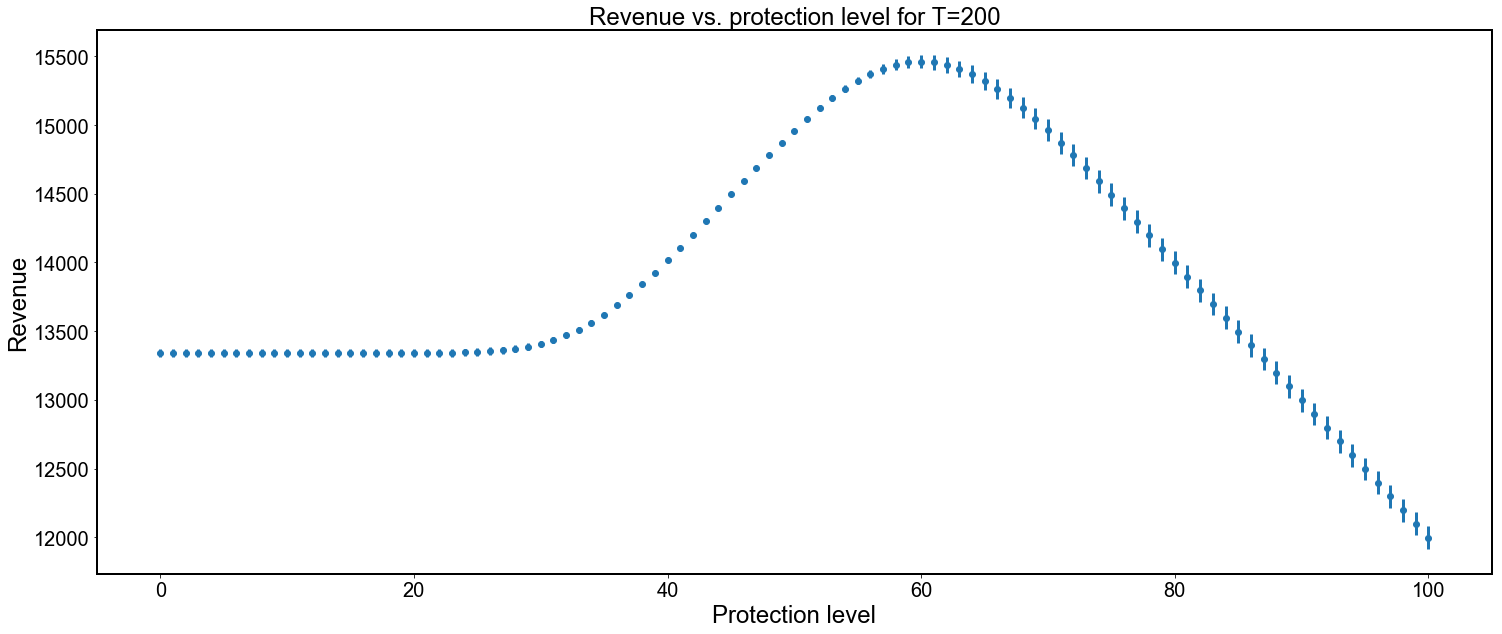

In [33]:
T = 200
revenue = np.zeros((c+1,num_samples))

for i in range(num_samples):    
    arrivals = generate_arrivals(T,lmbd_arr)
    for prot_level in prot_level_array:
        sales = simulate_sales(arrivals,c,prices,prot_level)
        revenue[prot_level,i]+= np.sum(sales*prices)
    
rev_stats = []
for x in prot_level_array:
    rev_stats.append((np.mean(revenue[x]),st.t.interval(0.95, len(revenue[x])-1, loc=np.mean(revenue[x]), scale=st.sem(revenue[x]))))
y_err_lower = [rev_stats[i][0]-rev_stats[i][1][0] for i in range(c+1)]
y_err_upper = [rev_stats[i][1][1]-rev_stats[i][0] for i in range(c+1)]
avg_revenue = [rev_stats[i][0] for i in range(c+1)]

plt.errorbar(prot_level_array,avg_revenue,yerr = [y_err_lower,y_err_upper],fmt='o')
plt.xlabel('Protection level')
plt.ylabel('Revenue')
plt.title('Revenue vs. protection level for T=200')


### Part (c) and (d): Learning protection-levels from all past-sales data (no choice model)

In [35]:
num_flights = 500
num_samples = 1000
lmbd_arr = np.array([0.1,0.3,0.6,0.0,0.0])
lmbd_arr = lmbd_arr/sum(lmbd_arr)
initial_explore = 50

Final protection level =  30


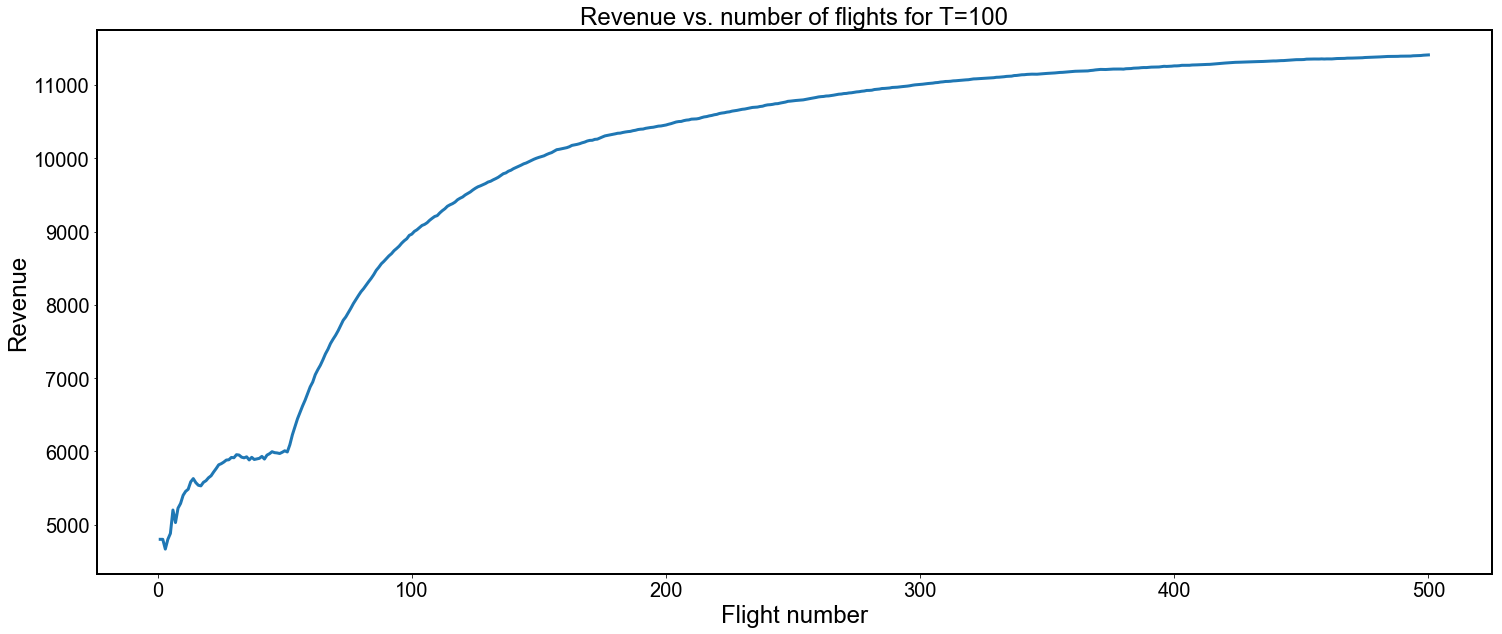

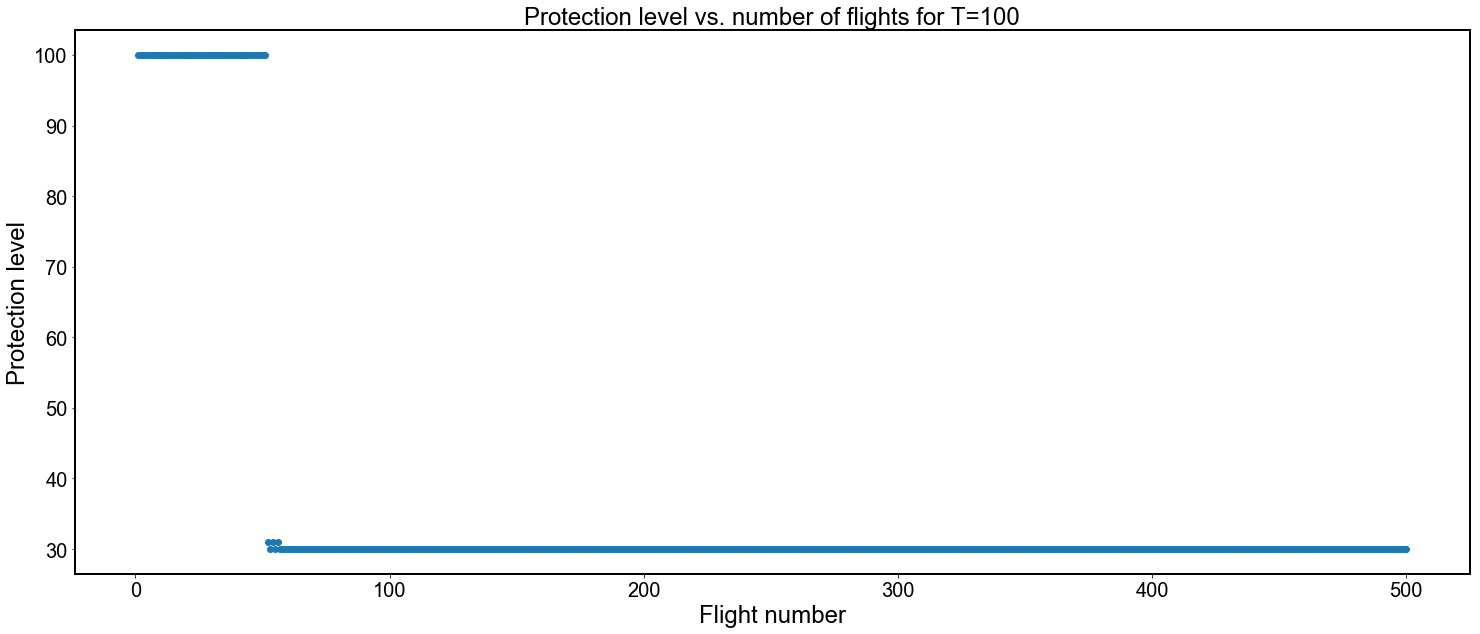

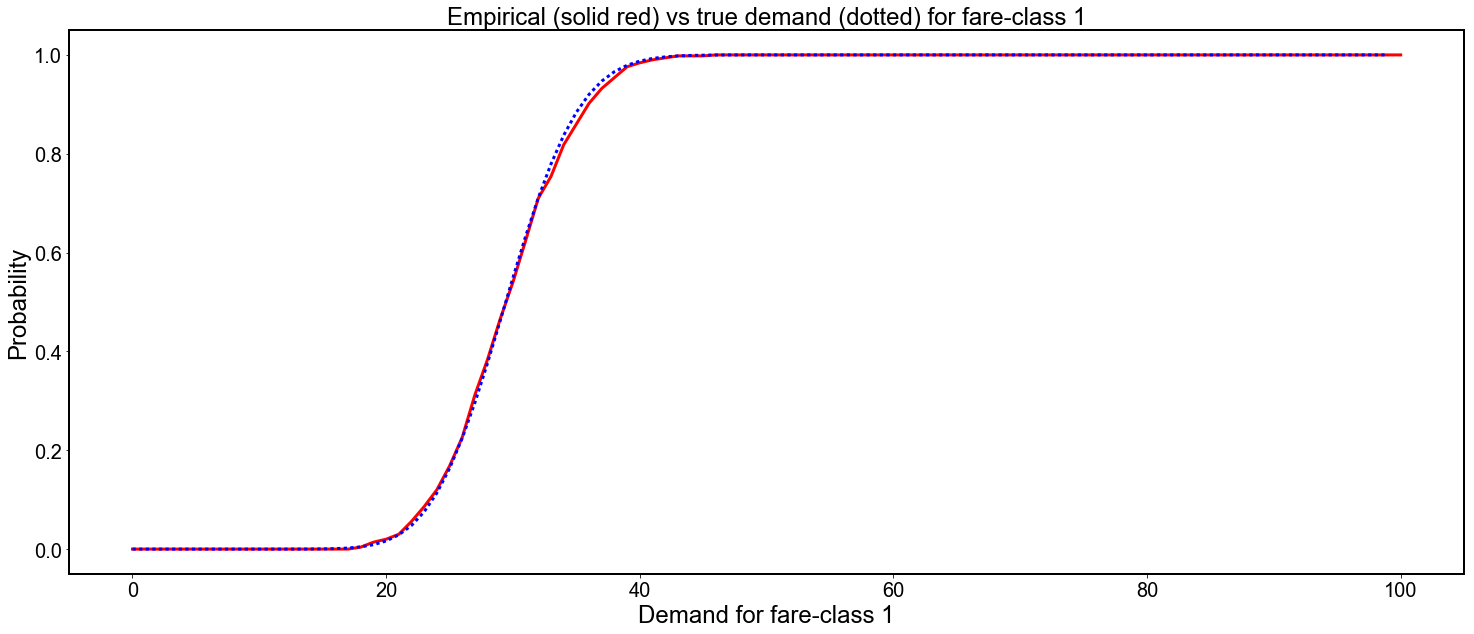

In [52]:
T = 100
prot_level_array = []

# Array to store number of class 1 tickets sold on each past flight
sales_history = np.zeros(c+1)

revenue_exploit = np.zeros(num_flights)
for i in range(num_flights):
    if i<=initial_explore:
        prot_level = c
    else:    
        prot_level = find_prot_level(sales_history,prices)
    prot_level_array.append(prot_level)

    arrivals = generate_arrivals(T,lmbd_arr)
    sales = simulate_sales(arrivals,c,prices,prot_level)
    sales_history[int(sales[0])]+=1
    revenue_exploit[i] = np.sum(sales*prices)

num_array = np.asarray([i+1 for i in range(num_flights)])
print('Final protection level = ',prot_level_array[-1])
plt.plot(num_array,np.cumsum(revenue_exploit)/num_array)
plt.xlabel('Flight number')
plt.ylabel('Revenue')
plt.title('Revenue vs. number of flights for T=100')
plt.show()
plt.plot(num_array,prot_level_array,'o')
plt.xlabel('Flight number')
plt.ylabel('Protection level')
plt.title('Protection level vs. number of flights for T=100')
plt.show()
plt.plot(np.cumsum(sales_history)/num_flights,'r')
from scipy.stats import binom
plt.plot([binom.cdf(i,T,lmbd_arr[1]) for i in range(T)],':b')
plt.xlabel('Demand for fare-class 1')
plt.ylabel('Probability')
plt.title('Empirical (solid red) vs true demand (dotted) for fare-class 1')
plt.show()

Final protection level =  60


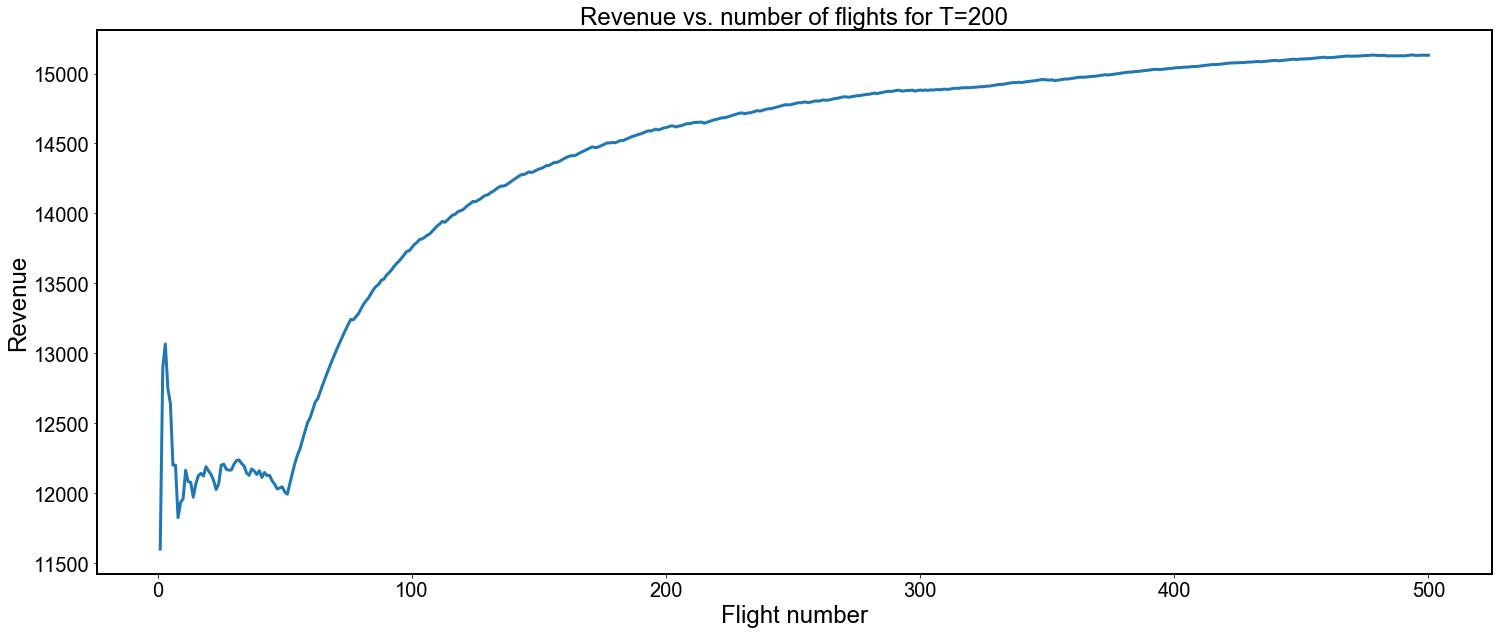

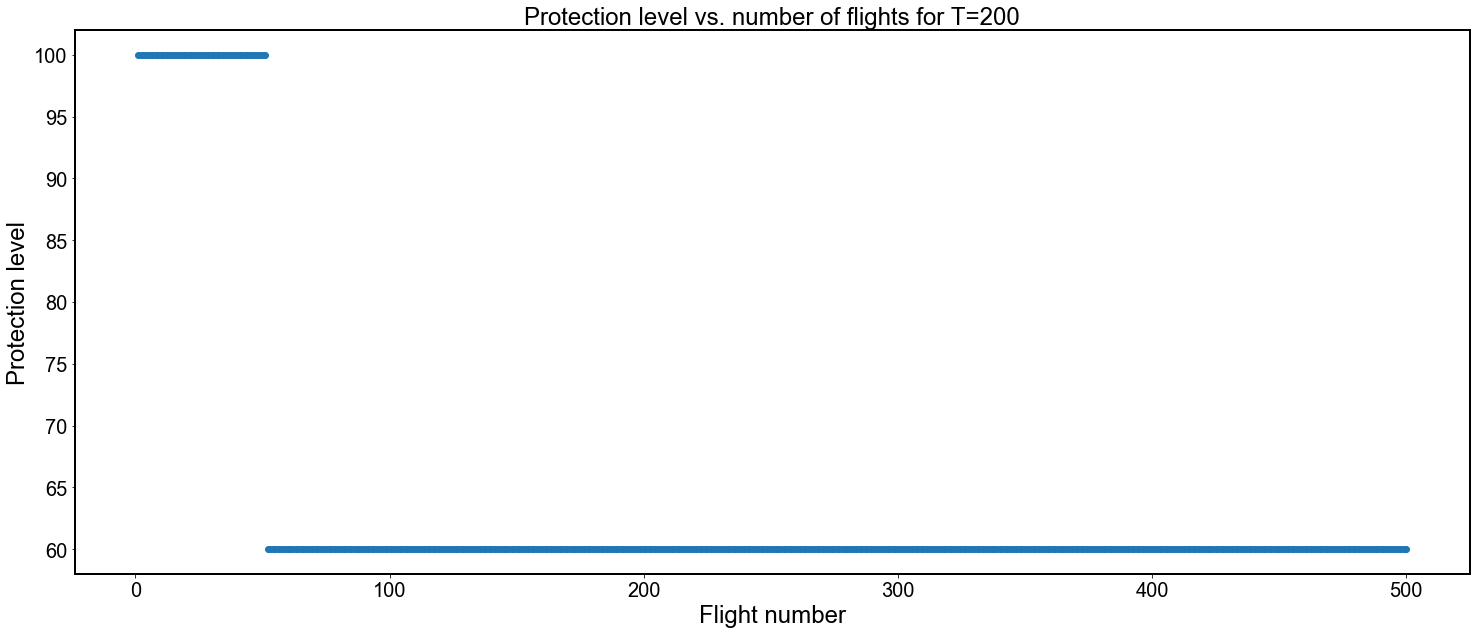

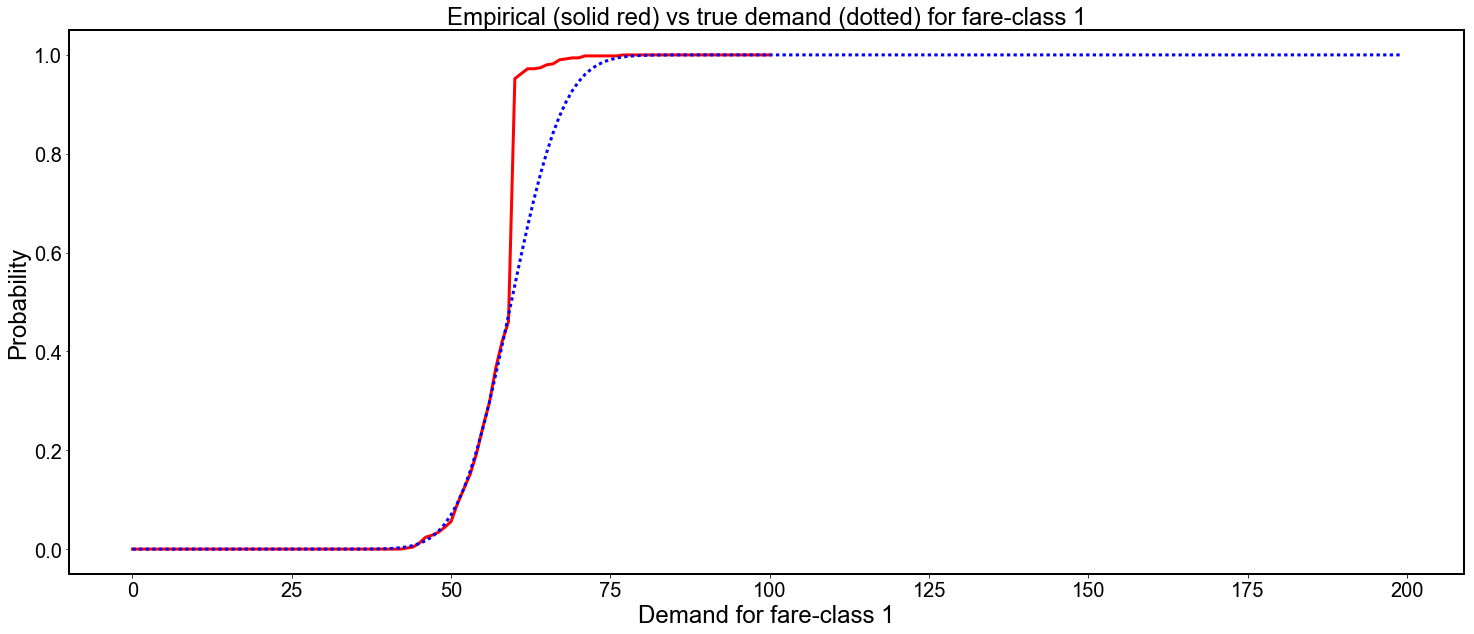

In [53]:
T = 200
prot_level_array = []

# Array to store number of class 1 tickets sold on each past flight
sales_history = np.zeros(c+1)

revenue_exploit = np.zeros(num_flights)
for i in range(num_flights):
    if i<=initial_explore:
        prot_level = c
    else:    
        prot_level = find_prot_level(sales_history,prices)
    prot_level_array.append(prot_level)

    arrivals = generate_arrivals(T,lmbd_arr)
    sales = simulate_sales(arrivals,c,prices,prot_level)
    sales_history[int(sales[0])]+=1
    revenue_exploit[i] = np.sum(sales*prices)

num_array = np.asarray([i+1 for i in range(num_flights)])
print('Final protection level = ',prot_level_array[-1])
plt.plot(num_array,np.cumsum(revenue_exploit)/num_array)
plt.xlabel('Flight number')
plt.ylabel('Revenue')
plt.title('Revenue vs. number of flights for T=200')
plt.show()
plt.plot(num_array,prot_level_array,'o')
plt.xlabel('Flight number')
plt.ylabel('Protection level')
plt.title('Protection level vs. number of flights for T=200')
plt.show()
plt.plot(np.cumsum(sales_history)/num_flights,'r')
from scipy.stats import binom
plt.plot([binom.cdf(i,T,lmbd_arr[1]) for i in range(T)],':b')
plt.xlabel('Demand for fare-class 1')
plt.ylabel('Probability')
plt.title('Empirical (solid red) vs true demand (dotted) for fare-class 1')
plt.show()

### Part (e): Learning protection-levels from past-sales data (with choice model)

In [57]:
num_flights = 500
num_samples = 1000
lmbd_arr = np.array([0.1,0.0,0.4,0.0,0.5])
lmbd_arr = lmbd_arr/sum(lmbd_arr)
initial_explore = 50

Final protection level =  1


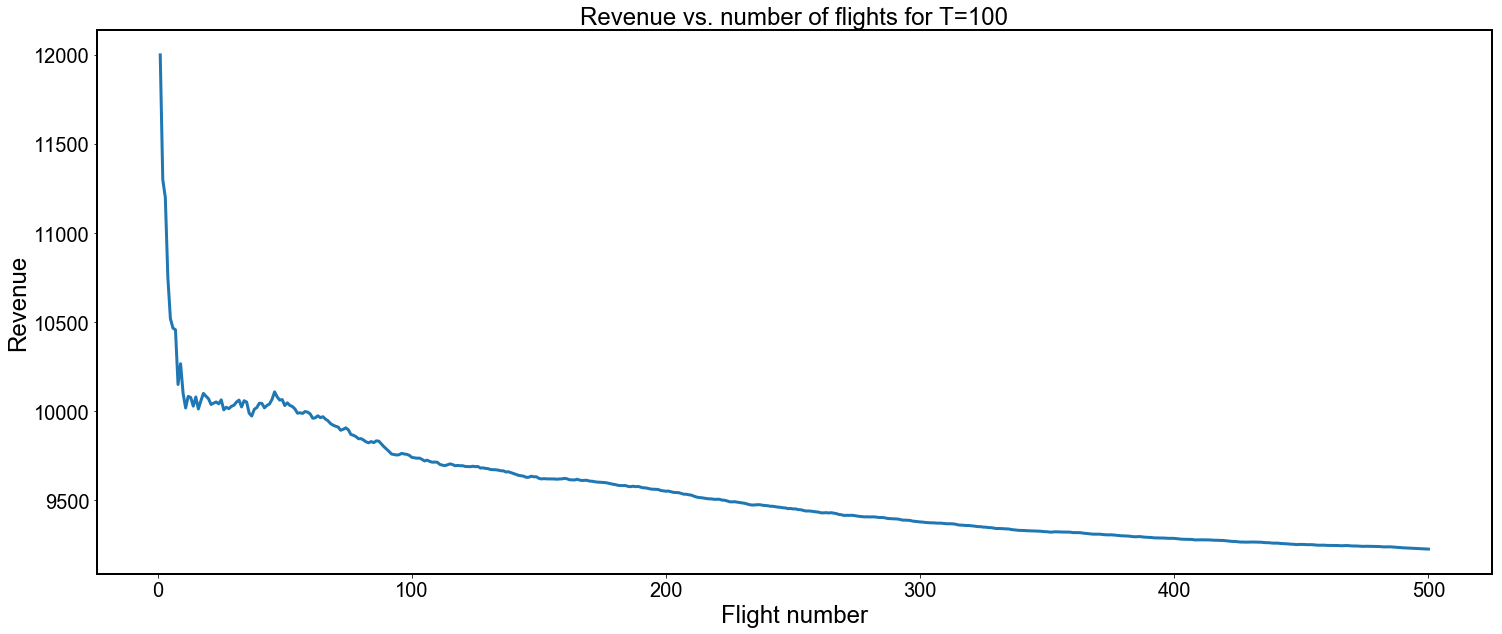

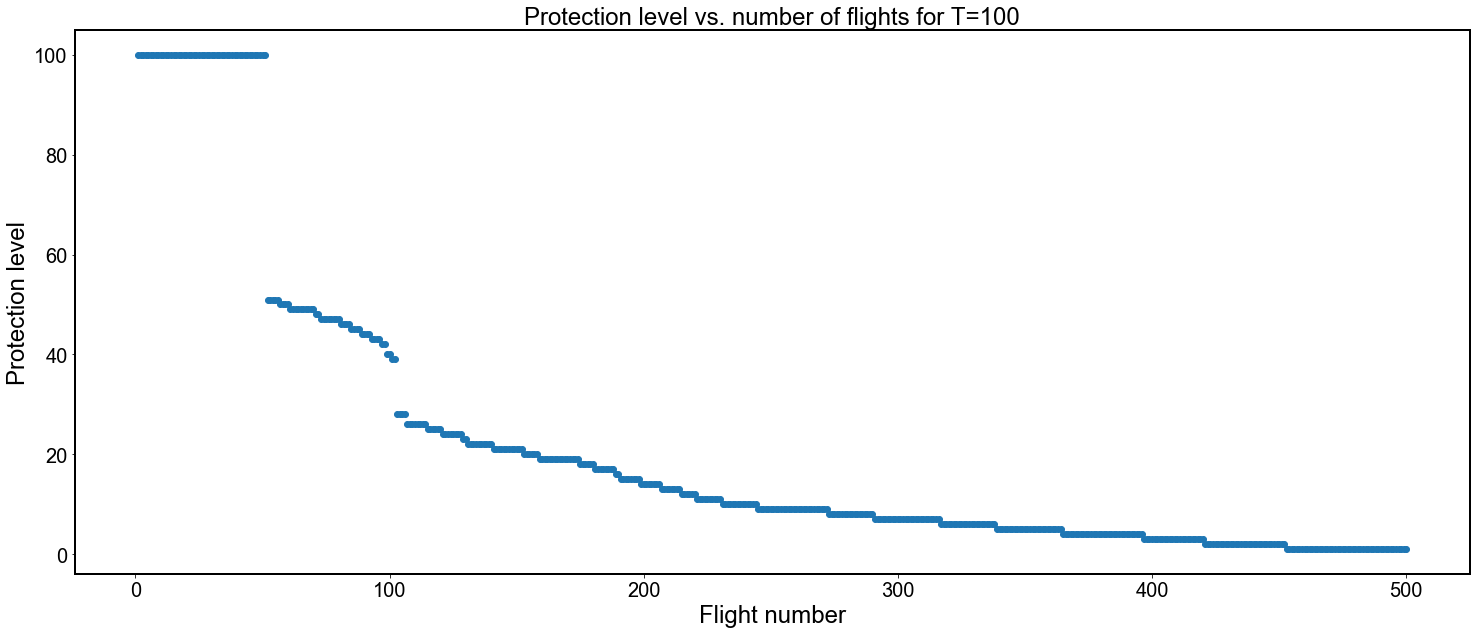

In [58]:
T = 100
prot_level_array = []

# Array to store number of class 1 tickets sold on each past flight
sales_history = np.zeros(c+1)

revenue_exploit = np.zeros(num_flights)
for i in range(num_flights):
    if i<=initial_explore:
        prot_level = c
    else:    
        prot_level = find_prot_level(sales_history,prices)
    prot_level_array.append(prot_level)

    arrivals = generate_arrivals(T,lmbd_arr)
    sales = simulate_sales(arrivals,c,prices,prot_level)
    sales_history[int(sales[0])]+=1
    revenue_exploit[i] = np.sum(sales*prices)

num_array = np.asarray([i+1 for i in range(num_flights)])
print('Final protection level = ',prot_level_array[-1])
plt.plot(num_array,np.cumsum(revenue_exploit)/num_array)
plt.xlabel('Flight number')
plt.ylabel('Revenue')
plt.title('Revenue vs. number of flights for T=100')
plt.show()
plt.plot(num_array,prot_level_array,'o')
plt.xlabel('Flight number')
plt.ylabel('Protection level')
plt.title('Protection level vs. number of flights for T=100')
plt.show()

### Part (f): Finding optimal protection level under choice model

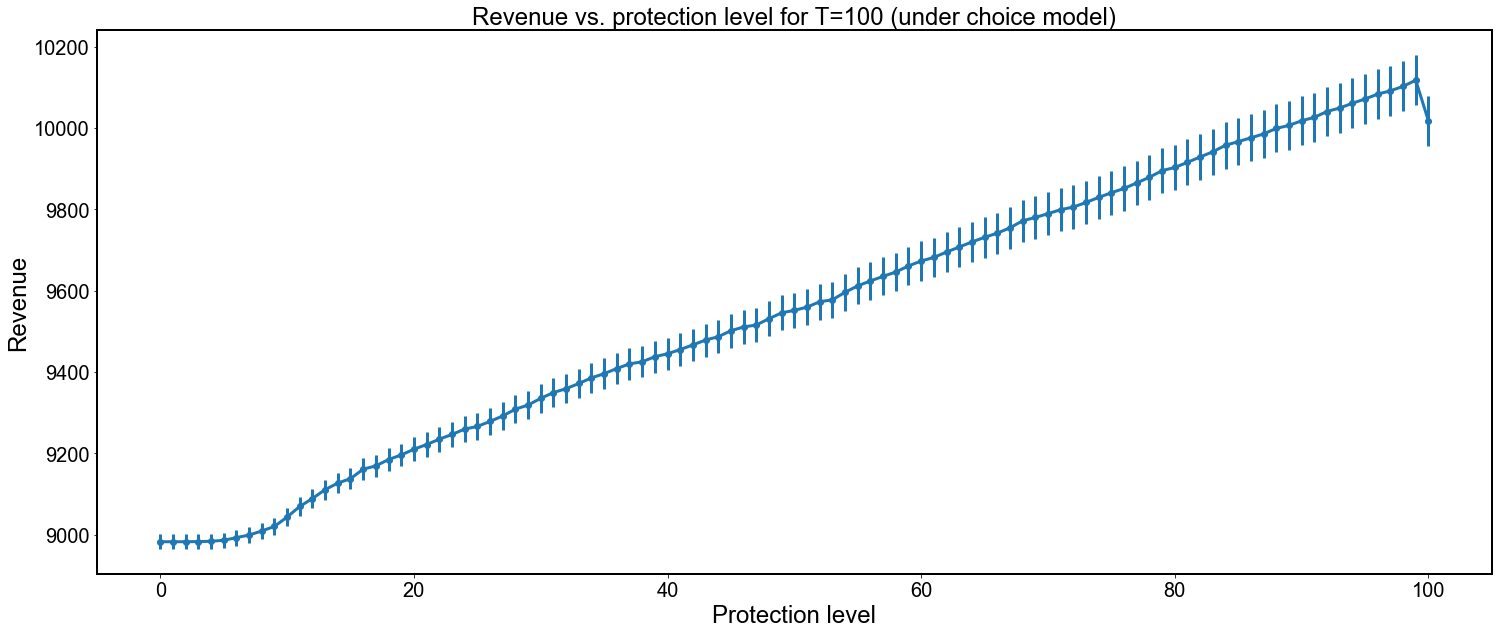

In [60]:
prot_level_array = np.arange(c+1)
num_samples = 1000
T = 100

revenue = np.zeros((c+1,num_samples))

for i in range(num_samples):    
    arrivals = generate_arrivals(T,lmbd_arr)
    for prot_level in prot_level_array:
        sales = simulate_sales(arrivals,c,prices,prot_level)
        revenue[prot_level,i]+= np.sum(sales*prices)
    

rev_stats = []
for x in prot_level_array:
    rev_stats.append((np.mean(revenue[x]),st.t.interval(0.95, len(revenue[x])-1, loc=np.mean(revenue[x]), scale=st.sem(revenue[x]))))
y_err_lower = [rev_stats[i][0]-rev_stats[i][1][0] for i in range(c+1)]
y_err_upper = [rev_stats[i][1][1]-rev_stats[i][0] for i in range(c+1)]
avg_revenue = [rev_stats[i][0] for i in range(c+1)]

plt.errorbar(prot_level_array,avg_revenue,yerr = [y_err_lower,y_err_upper],fmt='o-')
plt.xlabel('Protection level')
plt.ylabel('Revenue')
plt.title('Revenue vs. protection level for T=100 (under choice model)')